# Customer Data Preprocessing

# Data Processing

# Que 1,2 ,3:

In [1]:
import csv

problematic_rows = []  # It is a list that contains the entries for problematic rows for dependants.

def str_to_bool(value):       # Takes one parameter as value, this function convert certain string representaion to bool values
    return value.lower() == 'true'  #convert input string to lowercase to ensure comparison is case-sensitive and if it matches it return 'true'

def convert_to_int(index, value): # The purpose of this function is to convert a string value to an integer. Takes 2 parameters index an int representing the index of a row. value a string representing a value from a specific column in that row.
    if value.strip():
        return int(value)
    else:
        problematic_rows.append(index+2) # we are not counting header as well as indexing starts from 0 in the for loop. That's why use +2. 
        return 0

data = []  #creating list to append all our record.

def read_csv(file_path):   #we cannot give file path here as it is a function can only pass parameter. otherwise, shows syntax error.
                  

    with open('acw_user_data.csv', mode = 'r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file) #csv.DictReader when you have column headers as strings and want to work with dictionaries for easier data manipulation.  
        



        for i, row in enumerate(csv_reader):  #The enumerate(reader) function returns both the index (i) and the corresponding row (row) from the reader
            record = {
                'First Name': row['First Name'],
                'Last Name': row['Last Name'],
                'Age (Years)': int(row['Age (Years)']),
                'Sex': row['Sex'],
                'Retired': str_to_bool(row['Retired']),
                'Marital Status': row['Marital Status'],
                'Dependants': convert_to_int(i, row['Dependants']),
                'Yearly Salary (GBP)': int(row['Yearly Salary (GBP)']),
                'Yearly Pension (GBP)': int(row['Yearly Pension (GBP)']),
                'Employer Company': row['Employer Company'],
                'Distance Commuted to Work (Km)': float(row['Distance Commuted to Work (Km)']),
                'Vehicle': {
                    'Vehicle Make': row['Vehicle Make'],
                    'Vehicle Model': row['Vehicle Model'],
                    'Vehicle Year': int(row['Vehicle Year']),
                    'Vehicle Type': row['Vehicle Type']
                },
                'Credit Card': {
                    'Credit Card Start Date': row['Credit Card Start Date'],
                    'Credit Card Expiry Date': row['Credit Card Expiry Date'],
                    'Credit Card Number': int(row['Credit Card Number']),
                    'Credit Card CVV': int(row['Credit Card CVV']),
                    'Bank IBAN': row['Bank IBAN']
                },
                'Address': {
                    'Address Street': row['Address Street'],
                    'Address City': row['Address City'],
                    'Address Postcode': row['Address Postcode']
                }
            }

            data.append(record)

    return data


file_path = 'acw_user_data.csv'
csv_data = read_csv('acw_user_data.csv')
print(csv_data[0])

print("Problematic Rows For Dependants:" ,problematic_rows)


{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Retired': True, 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Yearly Salary (GBP)': 72838, 'Yearly Pension (GBP)': 7257, 'Employer Company': 'N/A', 'Distance Commuted to Work (Km)': 0.0, 'Vehicle': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': 2009, 'Vehicle Type': 'Pickup'}, 'Credit Card': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}}
Problematic Rows For Dependants: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]


# Que 4: 

In [2]:
import json
with open('processed.json' , mode = 'w') as manifest:
    json.dump(csv_data , manifest)

# Que 5:

In [3]:
# Retired and Employed Customer separate list

#retired_customers = [cust for cust in csv_data if cust['Retired'] == 'TRUE']
#employed_customers = [cust for cust in csv_data if cust['Employer Company'] != 'N/A']

retired_customers = [cust for cust in csv_data if cust['Retired'] == True]
employed_customers = [cust for cust in csv_data if cust['Employer Company'] != 'N/A']

# Writing retired customer to retired.json
with open ('retired.json', 'w') as manifest1:
    json.dump(retired_customers, manifest1)

# Writing employed customer to employed.json
with open ('employed.json', 'w') as manifest2:
    json.dump(employed_customers, manifest2)


# Que 6: 

In [4]:


import json
from datetime import datetime  # Importing datetime package


def flagged_rrow(row):
    """
    This Function will perform:

    Determines whether the start and end dates of a credit card row should trigger a flag.
    
    Argument:
        row (dict): A single row from the CSV data with the 'Credit Card' nested dictionary.
    
    Returns:
        bool: True in the event that the row has to be flagged, False otherwise.
    """
    
    # Extract the start and end dates from the row
    start_date_str = row['Credit Card']['Credit Card Start Date']
    end_date_str = row['Credit Card']['Credit Card Expiry Date']
    
    # Convert the start and end dates to datetime objects
    start_date = datetime.strptime(start_date_str, "%m/%y")   #strptime() allows you to convert date and time strings into structured datetime objects
    end_date = datetime.strptime(end_date_str, "%m/%y")

    
    # Calculate the difference between the end and start dates
    diff = end_date - start_date
    
    # Check if the difference is more than 10 years
    if diff.days > 3650:  #The value 3650 corresponds to the number of days in 10 years.
        
        
        
        # Return True to flag the row
        return True
    
    # Return False to not flag the row
    return False

rows_to_remove = [row for row in data if flagged_rrow(row)]
    
# Write the row to the remove_ccard.json file
with open('remove_ccard.json', 'w') as f:
    json.dump(rows_to_remove, f)
           

print("Rows flagged for removal:", len(rows_to_remove))




Rows flagged for removal: 256


# Que 7:

In [5]:
import json

# Read the processed.json file
with open('processed.json', 'r') as f:
    customers = json.load(f)

# Calculate the new 'Salary-Commute' attribute for each customer
for customer in customers:
    if customer['Distance Commuted to Work (Km)'] > 1:
        customer['Salary-Commute'] = customer['Yearly Salary (GBP)'] / customer['Distance Commuted to Work (Km)']
    else:
        customer['Salary-Commute'] = customer['Yearly Salary (GBP)']

# Sort the customers by the 'Salary-Commute' attribute in ascending order
customers.sort(key=lambda x: x['Salary-Commute'])

# Write the sorted customers to the commute.json file
with open('commute.json', 'w') as f:
    json.dump(customers, f)

# Data Visualization:

# 1.


In [6]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv('acw_user_data.csv')

# Obtain the Data Series for Salary and Age
salary = df['Yearly Salary (GBP)']
age = df['Age (Years)']

# Calculate the mean salary
mean_salary = salary.mean()

# Calculate the median age
median_age = age.median()

# Print the results
print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Age: {median_age:.2f}")

Mean Salary: 57814.08
Median Age: 54.00


# 2 & 4:

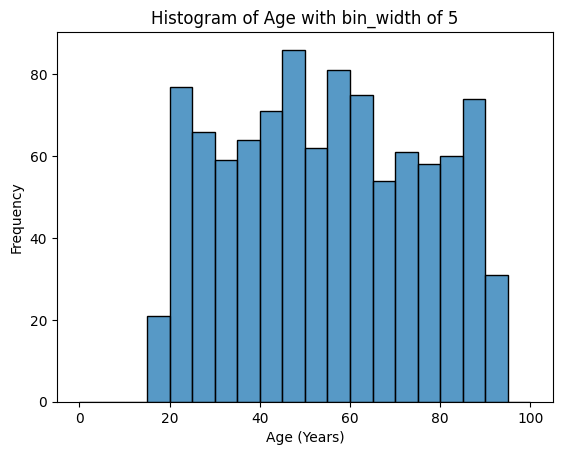

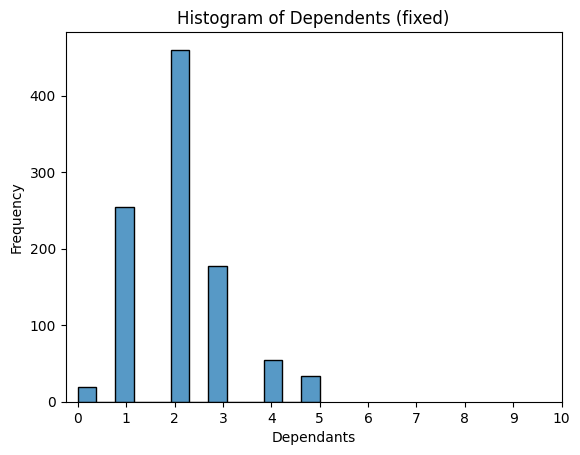

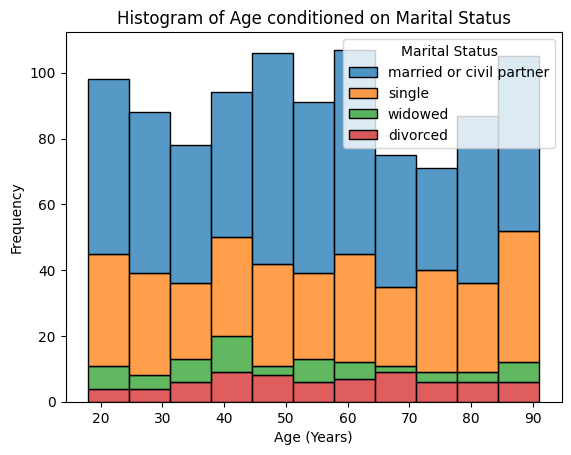

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Read the processed.json file
with open('processed.json', 'r') as f:
    customers = json.load(f)

# Convert the customer list to a DataFrame
df = pd.DataFrame(customers)

# Plot Age with bin_width of 5
sns.histplot(data=df, x='Age (Years)', bins=range(0, 101, 5), kde=False)
plt.title('Histogram of Age with bin_width of 5')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.savefig('Age_vs_Frequency_bin.png')
plt.show()

# Fix data errors in Dependents
sns.histplot(data=df, x='Dependants', kde=False)
plt.title('Histogram of Dependents (fixed)')
plt.xlabel('Dependants')
plt.ylabel('Frequency')
plt.savefig('Dependants_vs_Frequency.png')
plt.xticks(range(0, 11))
plt.show()

# Plot Age conditioned on Marital Status
sns.histplot(data=df, x='Age (Years)', hue='Marital Status', kde=False, multiple="stack")
plt.title('Histogram of Age conditioned on Marital Status')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.savefig('Age (Years)_vs_Frequency_martial.png')
plt.show()

# 3& 4:

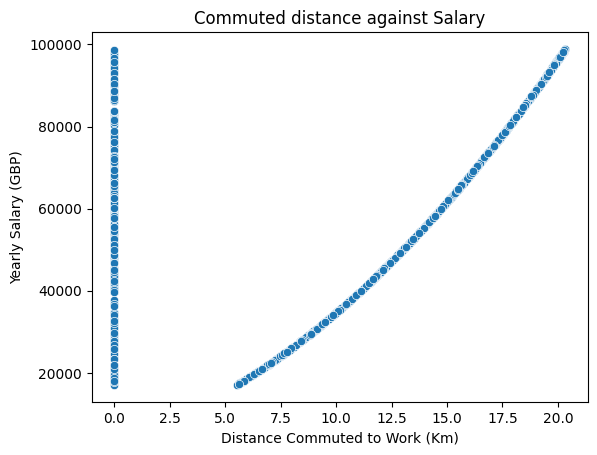

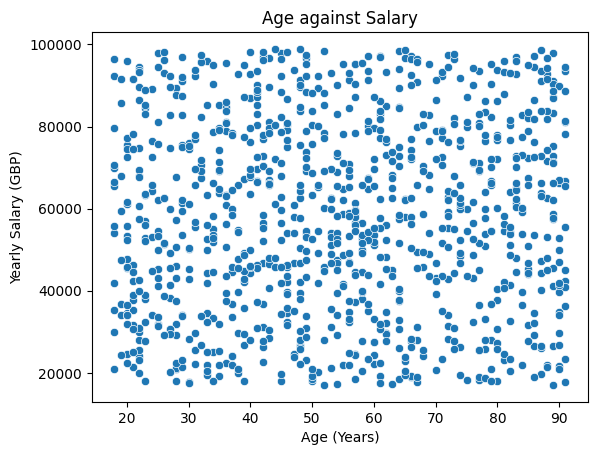

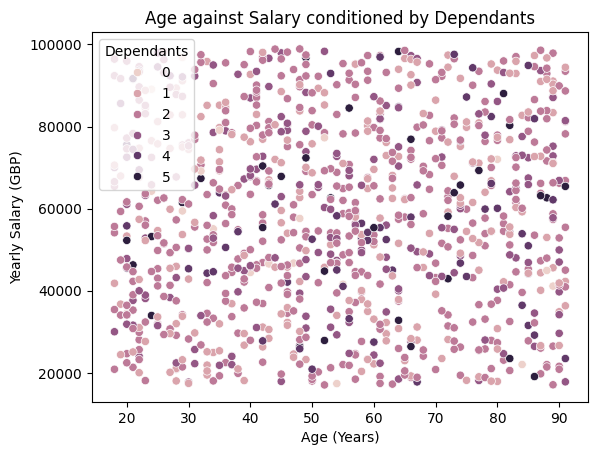

In [8]:


import seaborn as sns
import matplotlib.pyplot as plt

# Plot Commuted distance against Salary
sns.scatterplot(data=df, x='Distance Commuted to Work (Km)', y='Yearly Salary (GBP)')
plt.title('Commuted distance against Salary')
plt.xlabel('Distance Commuted to Work (Km)')
plt.ylabel('Yearly Salary (GBP)')
plt.savefig('commuted_distance_vs_salary.png')
plt.show()

# Plot Age against Salary
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (GBP)')
plt.title('Age against Salary')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (GBP)')
plt.savefig('age_vs_salary.png')
plt.show()

# Plot Age against Salary conditioned by Dependants
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (GBP)', hue='Dependants')
plt.title('Age against Salary conditioned by Dependants')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (GBP)')
plt.savefig('age_vs_salary_by_dependants.png')
plt.show()